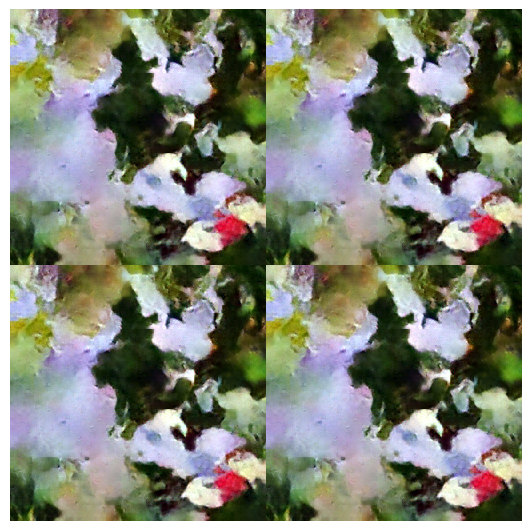

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image

img = Image.open('image.jpg')

num_rows=num_cols=2
fig, axes = plt.subplots(num_rows, num_cols)#, figsize=(12, 12))
# plt.subplots_adjust(hspace=-.3)
# plt.subplots_adjust(bottom=0, top=0.1)



axes[0, 0].imshow(img)
axes[0, 0].set_title(f"Flower", fontsize=12)
axes[0, 1].imshow(img)
axes[0, 1].set_title(f"Grower", fontsize=12)
axes[1, 0].imshow(img)
axes[1, 0].set_title(f"Shower", fontsize=12)
axes[1, 1].imshow(img)
axes[1, 1].set_title(f"Lower", fontsize=12)

axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')

# axes.axis('off')
# plt.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

(-0.5, 626.5, 499.5, -0.5)

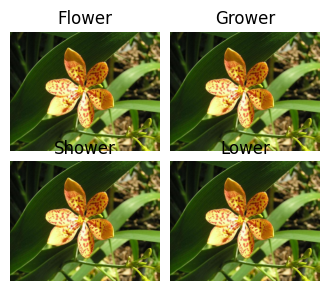

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image

img = Image.open('image.jpg')

num_rows=num_cols=2

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_rows,num_cols),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

grid[0].imshow(img)
grid[0].set_title(f"Flower", fontsize=12)
grid[1].imshow(img)
grid[1].set_title(f"Grower", fontsize=12)
grid[2].imshow(img)
grid[2].set_title(f"Shower", fontsize=12)
grid[3].imshow(img)
grid[3].set_title(f"Lower", fontsize=12)

grid[0].axis('off')
grid[1].axis('off')
grid[2].axis('off')
grid[3].axis('off')

In [5]:
print(plt.rcParams['figure.dpi'])

100.0


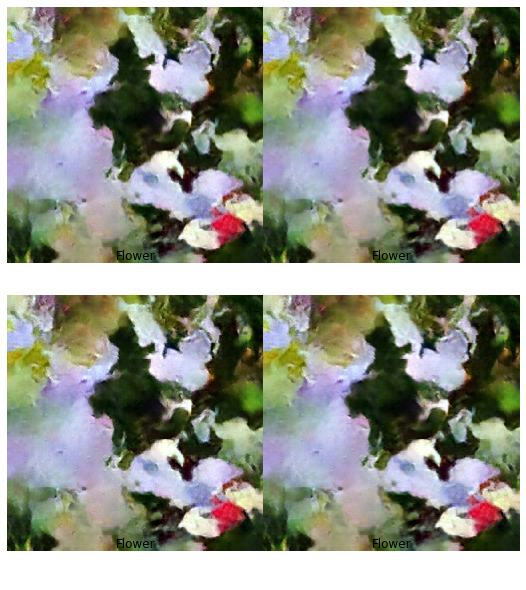

In [50]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('sample.jpg')

# dpi=plt.rcParams['figure.dpi']
dpi=72
px = 1/dpi
num_rows=num_cols=2

sampw = samph = 256
titleh = 32
h = num_rows*(samph+titleh)
w = num_cols*sampw

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(h*px, w*px))
# fig.subplots_adjust(top=1.0, bottom=0, right=1.0, left=0, hspace=0, wspace=0)
# maybe we should do all this with subplots?
# a subplot per row, and within those a subplot for image and subplot for text?
fig = plt.figure(figsize=(1., 1.), dpi=dpi)

for row in range(num_rows):
  for col in range(num_cols):
    left = col * sampw
    top = row * (samph+titleh)
    bottom = (num_rows - row - 1) * (samph+titleh)
    # bottom = (row+1) * (samph+titleh)
    img_ax = fig.add_axes([left * px, (bottom + titleh) * px, sampw * px, samph * px])
    img_ax.imshow(img)
    img_ax.axis('off')

    title_ax = fig.add_axes([left * px, bottom * px, sampw * px, titleh * px])
    title_ax.set_title(f"Flower", fontsize=12, va='center', ha='center')
    title_ax.axis('off')

plt.show()
# fig.savefig('tight1.jpg', bbox_inches = 'tight', pad_inches=0)
# plt.close(fig)

hard-
leaved
pocket
orchid


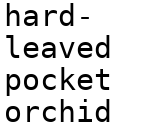

In [91]:
from PIL import Image, ImageDraw, ImageFont
from textwrap import TextWrapper

fnt = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", 30)

tmp = Image.new("RGB", (100, 100))
draw = ImageDraw.Draw(tmp)
bbox = draw.textbbox((0, 0), "M", font=fnt)
left, top, right, bottom = bbox
charw = right-left
charh = bottom-top

bbox2 = draw.textbbox((0, 0), "M\nM", font=fnt)
_, top_, _, bottom_ = bbox2
line_spacing = (bottom_-top_)-2*charh

textw = 150
textwr = TextWrapper(width=textw//charw)

lines = textwr.wrap('hard-leaved pocket orchid')
wrapped = "\n".join(lines)
print(wrapped)

line_count = len(lines)
texth = line_count*charh+(line_count-1)*line_spacing

margin_top, margin_left, margin_bottom, margin_right = (4,)*4

out = Image.new("RGB", (textw+margin_left+margin_right, texth+margin_top+margin_bottom), (255, 255, 255))
d = ImageDraw.Draw(out)

d.multiline_text((margin_left-left, margin_top-top), wrapped, font=fnt, fill=(0, 0, 0))

out.show()

In [67]:
from itertools import islice
from typing import Iterable, Iterator, List, Generator, TypeVar

T = TypeVar('T')

# https://github.com/python/cpython/issues/98363
def batched(iterable: Iterable[T], n: int) -> Generator[List[T], None, None]:
  "Batch data into lists of length n. The last batch may be shorter."
  # batched('ABCDEFG', 3) --> ABC DEF G
  if n < 1:
    raise ValueError('n must be >= 1')
  it: Iterator[T] = iter(iterable)
  while (batch := list(islice(it, n))):
    yield batch

def hardwrap(string: str, n: int) -> str:
  acc = ''
  it = iter(string)
  while (chunk := islice(it, n)):
    acc += chunk

# '\n'.join((''.join(chunk) for chunk in batched('hard-leaved pocket orchid', 10)))
print(hardwrap('hard-leaved pocket orchid', 10))

TypeError: can only concatenate str (not "itertools.islice") to str

In [39]:
from fontTools import ttLib

def get_vmetrics(fontPath):
  '''
  Get vertical metrics from a font file
  '''
  font = ttLib.TTFont(fontPath)
  metrics = {
      'upm': font['head'].unitsPerEm,
      'yMin': font['head'].yMin,
      'yMax': font['head'].yMax,
      # 'capHeight': font['OS/2'].sCapHeight,
      # 'xHeight': font['OS/2'].sxHeight,
      'ascender': font['OS/2'].sTypoAscender,
      'descender': font['OS/2'].sTypoDescender,
      'leading': font['OS/2'].sTypoLineGap,
  }
  return metrics
get_vmetrics("/usr/share/fonts/dejavu/DejaVuSansMono.ttf")

{'upm': 2048,
 'yMin': -767,
 'yMax': 2106,
 'ascender': 1556,
 'descender': -492,
 'leading': 410}

(0, 9, 24, 80)
24 71


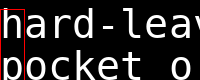

In [86]:
from PIL import Image, ImageDraw, ImageFont
image = Image.new("RGB", (200, 80))
draw = ImageDraw.Draw(image)
fnt = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", 40)

draw.text((0, 0), "hard-leaved\npocket orchid", font=fnt)
bbox = draw.textbbox((0, 0), "M\nM", font=fnt)
draw.rectangle(bbox, outline="red")
print(bbox)
left, top, right, bottom = bbox
width = right-left
height = bottom-top
print(width, height)

image.show()

In [ ]:
from PIL import ImageFont, ImageDraw

draw = ImageDraw.Draw(image)

# use a bitmap font
font = ImageFont.load("arial.pil")

draw.text((10, 10), "hello", font=font)

# use a truetype font
font = ImageFont.truetype("arial.ttf", 15)

draw.text((10, 25), "world", font=font)